In [3]:
!pip install --upgrade --force-reinstall pyodbc
!pip install --upgrade pip
!pip install stable-baselines3[extra] --timeout=100 --retries=5
!pip install pyglet==1.5.27 --timeout=100 --retries=5
!pip install gymnasium[atari]
!pip install --upgrade scipy
!pip install --upgrade gymnasium
!pip install gymnasium[atari,accept-rom-license]
!pip install AutoROM
!pip install --upgrade ale-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.0/336.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have sci

In [5]:
!pip cache purge

Files removed: 54


In [8]:
!pip install stable-baselines3[extra]
!pip install ale-py
!pip install opencv-python
!pip install torch torchvision torchaudio
!pip install numpy gymnasium-wrappers

ERROR: Could not find a version that satisfies the requirement gymnasium-wrappers (from versions: none)
ERROR: No matching distribution found for gymnasium-wrappers


In [14]:
import gymnasium as gym
print(sorted(gym.envs.registry.keys()))

['ALE/Adventure-ram-v5', 'ALE/Adventure-v5', 'ALE/AirRaid-ram-v5', 'ALE/AirRaid-v5', 'ALE/Alien-ram-v5', 'ALE/Alien-v5', 'ALE/Amidar-ram-v5', 'ALE/Amidar-v5', 'ALE/Assault-ram-v5', 'ALE/Assault-v5', 'ALE/Asterix-ram-v5', 'ALE/Asterix-v5', 'ALE/Asteroids-ram-v5', 'ALE/Asteroids-v5', 'ALE/Atlantis-ram-v5', 'ALE/Atlantis-v5', 'ALE/Atlantis2-ram-v5', 'ALE/Atlantis2-v5', 'ALE/Backgammon-ram-v5', 'ALE/Backgammon-v5', 'ALE/BankHeist-ram-v5', 'ALE/BankHeist-v5', 'ALE/BasicMath-ram-v5', 'ALE/BasicMath-v5', 'ALE/BattleZone-ram-v5', 'ALE/BattleZone-v5', 'ALE/BeamRider-ram-v5', 'ALE/BeamRider-v5', 'ALE/Berzerk-ram-v5', 'ALE/Berzerk-v5', 'ALE/Blackjack-ram-v5', 'ALE/Blackjack-v5', 'ALE/Bowling-ram-v5', 'ALE/Bowling-v5', 'ALE/Boxing-ram-v5', 'ALE/Boxing-v5', 'ALE/Breakout-ram-v5', 'ALE/Breakout-v5', 'ALE/Carnival-ram-v5', 'ALE/Carnival-v5', 'ALE/Casino-ram-v5', 'ALE/Casino-v5', 'ALE/Centipede-ram-v5', 'ALE/Centipede-v5', 'ALE/ChopperCommand-ram-v5', 'ALE/ChopperCommand-v5', 'ALE/Combat-ram-v5', 'ALE

Epoch 1/5
Epoch 1 - Episode 1 - Steps: 2185 - Total Steps: 2185 - Replay Buffer Size: 2185 - Reward: 5900.0
Epoch 1 - Episode 2 - Steps: 2325 - Total Steps: 4510 - Replay Buffer Size: 4510 - Reward: 6000.0
Epoch 1 - Episode 3 - Steps: 3603 - Total Steps: 8113 - Replay Buffer Size: 8113 - Reward: 10500.0
Epoch 1 - Episode 4 - Steps: 5081 - Total Steps: 13194 - Replay Buffer Size: 10000 - Reward: 12900.0
Epoch 1 - Episode 5 - Steps: 2998 - Total Steps: 16192 - Replay Buffer Size: 10000 - Reward: 8600.0
Epoch 1 - Episode 6 - Steps: 2196 - Total Steps: 18388 - Replay Buffer Size: 10000 - Reward: 6200.0
Epoch 1 - Episode 7 - Steps: 2644 - Total Steps: 21032 - Replay Buffer Size: 10000 - Reward: 5700.0
Epoch 1 - Episode 8 - Steps: 3913 - Total Steps: 24945 - Replay Buffer Size: 10000 - Reward: 11300.0
Epoch 1 - Episode 9 - Steps: 2514 - Total Steps: 27459 - Replay Buffer Size: 10000 - Reward: 6700.0
Epoch 1 - Episode 10 - Steps: 3458 - Total Steps: 30917 - Replay Buffer Size: 10000 - Reward:

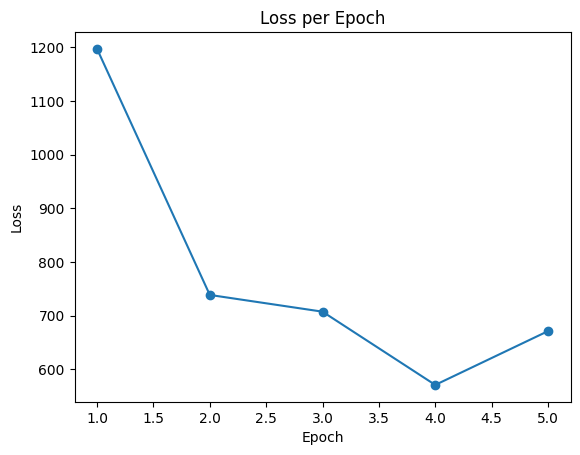

Video dari episode terbaik disimpan di CrazyClimber_best_episode.mp4


In [10]:
import gymnasium as gym
import numpy as np
import random
import torch
import ale_py
import torch.nn as nn
import torch.optim as optim
from collections import deque
from gymnasium.wrappers import ResizeObservation
import matplotlib.pyplot as plt
import cv2  # Untuk membuat video

# Hyperparameters
GAMMA = 0.99
LEARNING_RATE = 0.001
BUFFER_SIZE = 10000
BATCH_SIZE = 32
EPSILON_START = 1.0
EPSILON_END = 0.01
EPSILON_DECAY = 0.995
TARGET_UPDATE_INITIAL = 10  # Target update akan meningkat setiap epoch
TARGET_UPDATE_INCREMENT = 5

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten()
        )

        dummy_input = torch.zeros((1, *input_dim))  # (C, H, W)
        cnn_output_size = self.net(dummy_input).view(-1).size(0)

        self.fc = nn.Sequential(
            nn.Linear(cnn_output_size, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim)
        )

    def forward(self, x):
        x = self.net(x)
        return self.fc(x)

class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def add(self, transition):
        self.buffer.append(transition)

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return (
            torch.tensor(np.array(states), dtype=torch.float32),
            torch.tensor(actions, dtype=torch.long),
            torch.tensor(rewards, dtype=torch.float32),
            torch.tensor(np.array(next_states), dtype=torch.float32),
            torch.tensor(dones, dtype=torch.float32),
        )

    def size(self):
        return len(self.buffer)

def select_action(state, policy_net, epsilon, num_actions):
    if random.random() < epsilon:
        return random.randint(0, num_actions - 1)
    else:
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            return policy_net(state).argmax(dim=1).item()

def train(policy_net, target_net, replay_buffer, optimizer):
    if replay_buffer.size() < BATCH_SIZE:
        return None
    states, actions, rewards, next_states, dones = replay_buffer.sample(BATCH_SIZE)

    q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
    next_q_values = target_net(next_states).max(1)[0]
    target_q_values = rewards + (1 - dones) * GAMMA * next_q_values

    loss = nn.MSELoss()(q_values, target_q_values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

# Main loop
env_name = "ALE/CrazyClimber-v5"
env = gym.make(env_name, render_mode="rgb_array")
env = ResizeObservation(env, (84, 84))  # Resize frames

num_actions = env.action_space.n
input_shape = (3, 84, 84)

policy_net = DQN(input_shape, num_actions)
target_net = DQN(input_shape, num_actions)
target_net.load_state_dict(policy_net.state_dict())
optimizer = optim.Adam(policy_net.parameters(), lr=LEARNING_RATE)
replay_buffer = ReplayBuffer(BUFFER_SIZE)

epsilon = EPSILON_START
steps_done = 0
best_reward = -float('inf')
best_episode_frames = []  # Untuk menyimpan frame episode terbaik
losses = []  # Untuk menyimpan nilai loss
total_steps = 0
TARGET_UPDATE = TARGET_UPDATE_INITIAL

num_epochs = 5
episodes_per_epoch = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    epoch_losses = []

    for episode in range(episodes_per_epoch):
        state, _ = env.reset()
        state = np.transpose(state, (2, 0, 1))  # (C, H, W)
        state = state / 255.0
        total_reward = 0
        episode_frames = []  # Simpan frame dari episode ini
        steps_in_episode = 0

        for t in range(7200): #dapat diubah sesuai kebutuhan
            frame = env.render()  # Render frame
            episode_frames.append(frame)  # Simpan frame untuk video

            action = select_action(state, policy_net, epsilon, num_actions)
            next_state, reward, terminated, truncated, info = env.step(action)
            next_state = np.transpose(next_state, (2, 0, 1))
            next_state = next_state / 255.0
            done = terminated or truncated

            replay_buffer.add((state, action, reward, next_state, done))
            state = next_state
            total_reward += reward
            steps_in_episode += 1
            total_steps += 1

            loss = train(policy_net, target_net, replay_buffer, optimizer)
            if loss is not None:
                epoch_losses.append(loss)

            if total_steps % TARGET_UPDATE == 0:
                target_net.load_state_dict(policy_net.state_dict())

            if done:
                break

        # Simpan episode terbaik
        if total_reward > best_reward:
            best_reward = total_reward
            best_episode_frames = episode_frames

        epsilon = max(EPSILON_END, epsilon * EPSILON_DECAY)

        # Print log per episode
        print(f"Epoch {epoch + 1} - Episode {episode + 1} - Steps: {steps_in_episode} - Total Steps: {total_steps} - Replay Buffer Size: {replay_buffer.size()} - Reward: {total_reward}")

    losses.append(np.mean(epoch_losses))

    # Update target update interval
    TARGET_UPDATE += TARGET_UPDATE_INCREMENT

# Plot loss per epoch
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

env.close()

# Simpan video dari episode terbaik
if best_episode_frames:
    output_video_path = "CrazyClimber_best_episode.mp4"
    height, width, _ = best_episode_frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video = cv2.VideoWriter(output_video_path, fourcc,  60, (width, height))

    for frame in best_episode_frames:
        video.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # Konversi ke BGR untuk OpenCV

    video.release()
    print(f"Video dari episode terbaik disimpan di {output_video_path}")

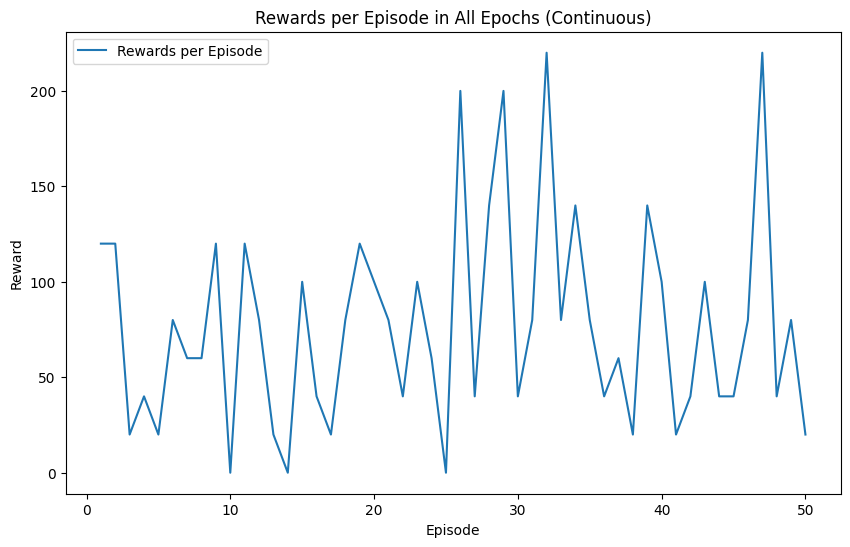

In [11]:
import matplotlib.pyplot as plt

# Example data for rewards per episode
epoch_rewards = [
    [120.0, 120.0, 20.0, 40.0, 20.0, 80.0, 60.0, 60.0, 120.0, 0.0],
    [120.0, 80.0, 20.0, 0.0, 100.0, 40.0, 20.0, 80.0, 120.0, 100.0],
    [80.0, 40.0, 100.0, 60.0, 0.0, 200.0, 40.0, 140.0, 200.0, 40.0],
    [80.0, 220.0, 80.0, 140.0, 80.0, 40.0, 60.0, 20.0, 140.0, 100.0],
    [20.0, 40.0, 100.0, 40.0, 40.0, 80.0, 220.0, 40.0, 80.0, 20.0]
]

# Create a list for the continuous episode indices
episode_indices = []
rewards = []

episode_counter = 1  # Start from episode 1
for epoch in range(len(epoch_rewards)):
    episode_indices.extend([episode_counter + i for i in range(len(epoch_rewards[epoch]))])
    rewards.extend(epoch_rewards[epoch])
    episode_counter += len(epoch_rewards[epoch])  # Update the episode counter

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(episode_indices, rewards, label='Rewards per Episode')

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards per Episode in All Epochs (Continuous)')
plt.legend()
plt.show()

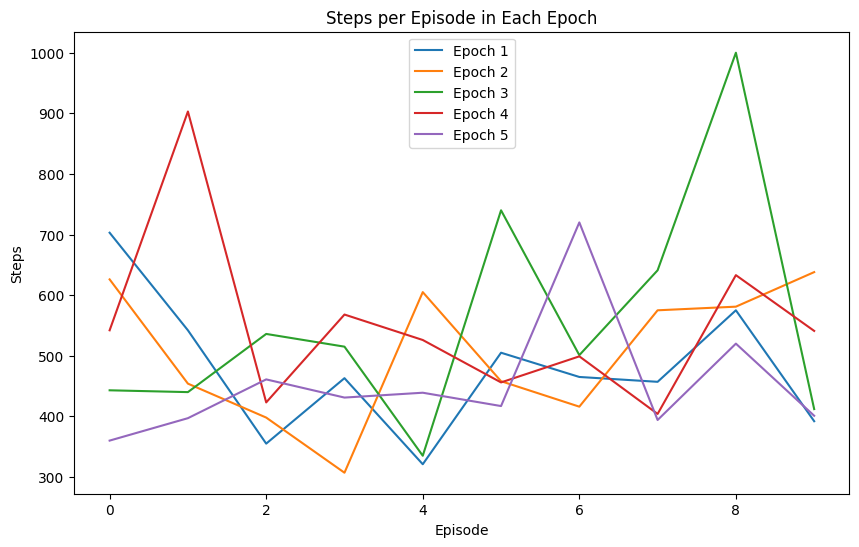

In [12]:
# Example data for steps per episode
epoch_steps = [
    [703, 542, 355, 463, 321, 505, 465, 457, 575, 392],
    [626, 454, 398, 307, 605, 458, 416, 575, 581, 638],
    [443, 440, 536, 515, 335, 740, 501, 641, 1000, 412],
    [542, 903, 423, 568, 526, 456, 499, 404, 633, 541],
    [360, 397, 461, 431, 439, 417, 720, 394, 520, 401]
]

# Plotting
plt.figure(figsize=(10, 6))
for epoch in range(len(epoch_steps)):
    plt.plot(epoch_steps[epoch], label=f'Epoch {epoch+1}')

plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Steps per Episode in Each Epoch')
plt.legend()
plt.show()

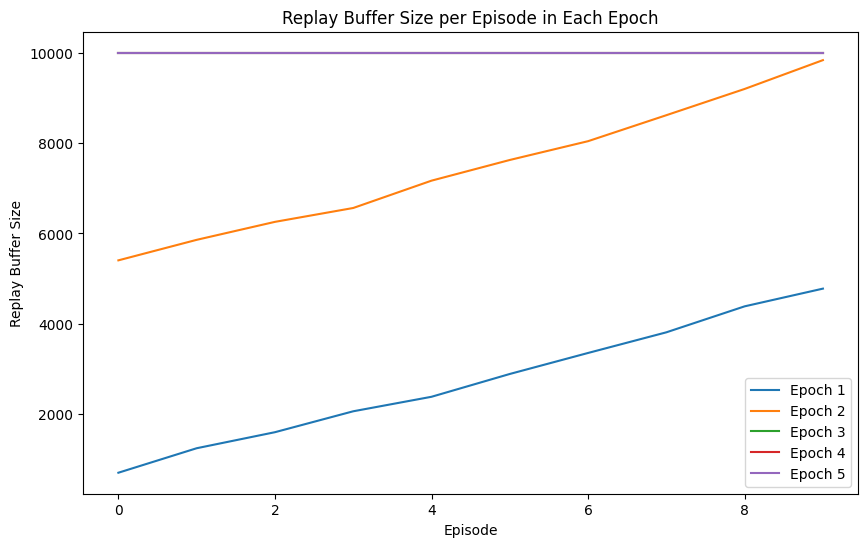

In [13]:
# Example data for replay buffer size per episode
epoch_buffer_size = [
    [703, 1245, 1600, 2063, 2384, 2889, 3354, 3811, 4386, 4778],
    [5404, 5858, 6256, 6563, 7168, 7626, 8042, 8617, 9198, 9836],
    [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000],
    [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000],
    [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
]

# Plotting
plt.figure(figsize=(10, 6))
for epoch in range(len(epoch_buffer_size)):
    plt.plot(epoch_buffer_size[epoch], label=f'Epoch {epoch+1}')

plt.xlabel('Episode')
plt.ylabel('Replay Buffer Size')
plt.title('Replay Buffer Size per Episode in Each Epoch')
plt.legend()
plt.show()